In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Method 1 Forcasting total quantity Against months

In [3]:
df =pd.read_csv('NewFactOrder.csv')

df

,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered
0,94940600,11,36200,red,SHIRT/BLOUSE,92/98,TOPS,Pre,4[92-98],2 TODDLER,SHIRT LS,20180121,1.0
1,94940600,12,12030,Blue,DENIM,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,NaN,20180121,1.0
2,94940600,13,7354,offwhite,TEES LS,92/98,TOPS,Pre,4[92-98],2 TODDLER,RIB,20180121,1.0
3,94940800,1,8501,offwhite,DRESSES LS,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,20180121,1.0
4,94940800,2,24256,offwhite,LEGGINGS,104/110,BOTTOMS,Main,5[104-110],3 KIDS,NaN,20180121,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525849,115941200,1,41610,green,BEANIES,44/46,HATS,Main,XHATS,1 BABY,NaN,20210101,1.0
525850,115941300,1,47710,Beige,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,20210101,1.0
525851,115941300,2,7781,blue,TEES LS,104/110,TOPS,Main,5[104-110],3 KIDS,NaN,20210101,1.0
525852,115941300,3,10311,Black,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,20210101,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525854 entries, 0 to 525853
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   OrderNumber       525854 non-null  int64  
 1   OrderRowNumber    525854 non-null  int64  
 2   ArticleKey        525854 non-null  int64  
 3   Colour            525387 non-null  object 
 4   ArticleGenre      525854 non-null  object 
 5   Size              525387 non-null  object 
 6   ArticleGroupName  525854 non-null  object 
 7   Collection        525854 non-null  object 
 8   SizeGroup         520329 non-null  object 
 9   BabyJunior        520329 non-null  object 
 10  ArticleMaterial   412090 non-null  object 
 11  DateOrderedKey    525854 non-null  int64  
 12  QuantityOrdered   525854 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 52.2+ MB


In [5]:
# data cleaning
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)



In [6]:
df

,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered
0,94940600,11,36200,red,SHIRT/BLOUSE,92/98,TOPS,Pre,4[92-98],2 TODDLER,SHIRT LS,20180121,1.0
2,94940600,13,7354,offwhite,TEES LS,92/98,TOPS,Pre,4[92-98],2 TODDLER,RIB,20180121,1.0
16,94941500,2,55705,black,TEES LS,80/86,TOPS,Main,3[80-86],2 TODDLER,RIB,20180121,1.0
27,94941900,3,23974,black,DRESSES SS,104/110,DRESSES,Main,5[104-110],3 KIDS,RIB,20180121,1.0
37,94942400,2,1880,black,LEGGINGS,92/98,BOTTOMS,Main,4[92-98],2 TODDLER,RIB,20180121,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525847,115941100,1,44489,Light blue,JACKETS PADDED,80/86,OUTERWEAR,Main,3[80-86],2 TODDLER,PUFFER,20210101,1.0
525848,115941100,2,6759,Light blue,JACKETS PADDED,104/110,OUTERWEAR,Main,5[104-110],3 KIDS,PUFFER,20210101,1.0
525850,115941300,1,47710,Beige,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,20210101,1.0
525852,115941300,3,10311,Black,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,20210101,1.0


In [7]:
df['DateOrderedKey'] = pd.to_datetime(df['DateOrderedKey'], format='%Y%m%d')


In [8]:
df

,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered
0,94940600,11,36200,red,SHIRT/BLOUSE,92/98,TOPS,Pre,4[92-98],2 TODDLER,SHIRT LS,2018-01-21,1.0
2,94940600,13,7354,offwhite,TEES LS,92/98,TOPS,Pre,4[92-98],2 TODDLER,RIB,2018-01-21,1.0
16,94941500,2,55705,black,TEES LS,80/86,TOPS,Main,3[80-86],2 TODDLER,RIB,2018-01-21,1.0
27,94941900,3,23974,black,DRESSES SS,104/110,DRESSES,Main,5[104-110],3 KIDS,RIB,2018-01-21,1.0
37,94942400,2,1880,black,LEGGINGS,92/98,BOTTOMS,Main,4[92-98],2 TODDLER,RIB,2018-01-21,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525847,115941100,1,44489,Light blue,JACKETS PADDED,80/86,OUTERWEAR,Main,3[80-86],2 TODDLER,PUFFER,2021-01-01,1.0
525848,115941100,2,6759,Light blue,JACKETS PADDED,104/110,OUTERWEAR,Main,5[104-110],3 KIDS,PUFFER,2021-01-01,1.0
525850,115941300,1,47710,Beige,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,2021-01-01,1.0
525852,115941300,3,10311,Black,LEGGINGS,104/110,BOTTOMS,Base,5[104-110],3 KIDS,JERSEY,2021-01-01,1.0


In [9]:
df_monthly = df.resample('M', on='DateOrderedKey').sum()


In [10]:
df_monthly

,OrderNumber,OrderRowNumber,ArticleKey,QuantityOrdered
DateOrderedKey,,,,
2018-01-31,219054607000,7693,66163463,2348.0
2018-02-28,307518418200,11255,87661976,3288.0
2018-03-31,251268634700,8515,71325706,2681.0
2018-04-30,174721658100,5228,52486330,1895.0
2018-05-31,258323655200,7679,76272704,2858.0
2018-06-30,513609839500,21146,147485578,5406.0
2018-07-31,562796497700,20861,168222126,5881.0
2018-08-31,610216055100,19523,184891881,6394.0
2018-09-30,548155859200,12279,151769697,6370.0


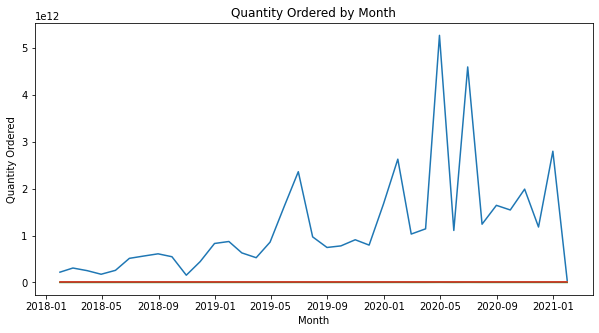

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df_monthly)
plt.title('Quantity Ordered by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.show()



In [12]:
! pip install pmdarima

import pmdarima as pm

In [13]:
from sklearn.model_selection import train_test_split

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=547.275, Time=0.58 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=539.659, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=541.034, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=542.699, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=545.711, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=541.369, Time=0.06 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=540.808, Time=0.06 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=542.749, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=539.317, Time=0.05 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=540.411, Time=0.08 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=542.357, Time=0.17 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=541.283, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=541.523, Time=0.06 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=539.792, Time=0.13 sec
 ARIMA(2,0,1)(0,1,0)[12] intercep

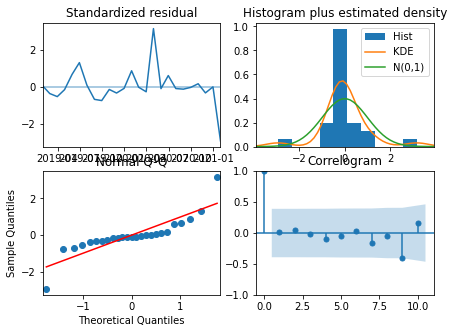

In [14]:
df = df_monthly.dropna()

model = pm.auto_arima(df.QuantityOrdered, error_action='ignore', trace=1,
                        suppress_warnings=True,
                        seasonal=True, m=12)

model.plot_diagnostics(figsize=(7,5))
plt.show()

In [15]:
y = df.QuantityOrdered
train, test = train_test_split(y)
# Fit model
model = pm.auto_arima(df.QuantityOrdered, error_action='ignore',
                      suppress_warnings=True,
                      seasonal=True, m=10)
forecasts = model.predict(test.shape[0])
x = np.arange(y.shape[0])

In [16]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   37
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 10)   Log Likelihood                -286.171
Date:                            Fri, 02 Jun 2023   AIC                            578.342
Time:                                    10:45:48   BIC                            582.230
Sample:                                01-31-2018   HQIC                           579.498
                                     - 01-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7893.1593   2143.528      3.682      0.000    3691.921    1.21e+04
ar.L1         -0.2949      0.282   

In [17]:
forecasts

2021-02-28    61008.161122
2021-03-31    14996.033442
2021-04-30    48805.330167
2021-05-31    17315.550051
2021-06-30    21106.579657
2021-07-31    20173.497877
2021-08-31    24300.678477
2021-09-30    16675.496239
2021-10-31    30825.729693
2021-11-30     6445.365914
Freq: M, dtype: float64

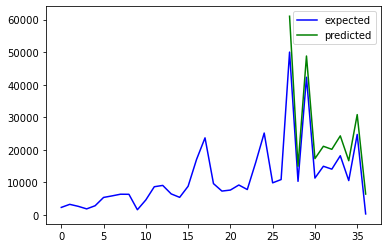

In [18]:
plt.plot(x, y, c='blue' , label = 'expected')
plt.plot(x[27:], forecasts, c='green' , label = 'predicted')
plt.legend()
plt.show()


In [19]:
# Calculate MAPE for the best model
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y[27:], forecasts)
print("MAPE for the best model of Auto-Arima:", mape)

MAPE for the best model of Auto-Arima: 2.0763877433451894
